In [1]:
 # Common imports y set up de cada notebook

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
from datetime import datetime
import time
import seaborn as sns

# Para mantener los resultados constantes al ejecutar
np.random.seed(42) # Un random.seed constante

# Para graficar figuras bonitas
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

mpl.rcParams["figure.figsize"] = (12,6.75)
mpl.rcParams["axes.grid"] = False


# Guardar/importar imágenes

PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
# Guardar/importar datos
DATA_PATH = os.path.join(PROJECT_ROOT_DIR, "data")
os.makedirs(DATA_PATH, exist_ok=True)

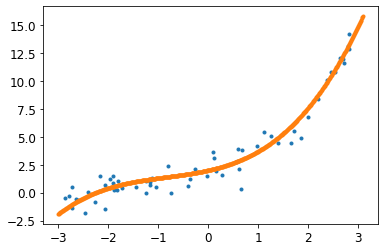

In [235]:
np.random.seed(42)
m=60


X = 6 * np.random.rand(m, 1) -3
y = 0.2*X**3 + 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
X_real = np.arange(-3.0, 3.1, 0.01)
y_real = 0.2*X_real**3 + 0.5 * X_real**2 + X_real + 2

plt.plot(X, y, ".")
plt.plot(X_real, y_real, ".")

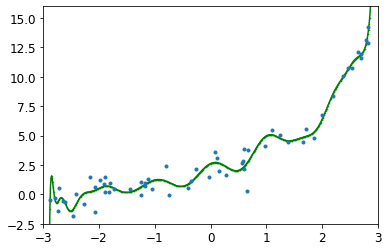

In [246]:
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 28, include_bias = False)
X_poly = poly_features.fit_transform(X)

model1 = LinearRegression()
model1.fit(X_poly, y)
model2 = LinearRegression()
model2.fit(X, y)

X_real_poly =  poly_features.transform(X_real.reshape(-1, 1))
y_model1 = model1.predict(X_real_poly)

plt.ylim(-2.5, 16.0)
plt.xlim(-3.0, 3.0)
plt.plot(X_real, y_model1, color='green', linestyle='-', marker='.',
     markerfacecolor='blue', markersize=1)
plt.plot(X, y, ".")

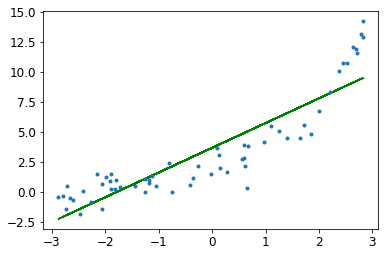

In [249]:
y_model2 = model2.predict(X)

plt.plot(X, y_model2, color='green', linestyle='-', marker='.',
     markerfacecolor='blue', markersize=1)
plt.plot(X, y, ".")

Saving figure overfitting


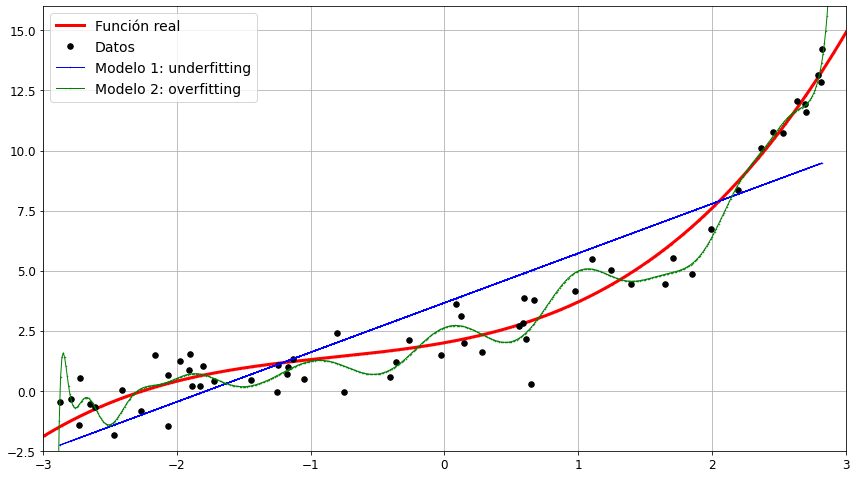

In [283]:
plt.figure(figsize = (12, 6.75))
plt.ylim(-2.5, 16.0)
plt.xlim(-3.0, 3.0)

plt.plot(X_real, y_real, color='red', linestyle='-', linewidth = 3, marker='.',
     markerfacecolor='blue', markersize=1, label = "Función real")

plt.plot(X, y, ".", color = "black", label = "Datos", markersize = 11)

plt.plot(X, y_model2, color='blue', linestyle='-', linewidth = 1, marker='.',
     markerfacecolor='blue', markersize=1, label = "Modelo 1: underfitting")

plt.plot(X_real, y_model1, color='green', linestyle='-', linewidth = 1, marker='.',
     markerfacecolor='blue', markersize=1, label = "Modelo 2: overfitting")

plt.grid()

plt.legend(fontsize = 14)

save_fig("overfitting", tight_layout=True, fig_extension="png", resolution=300)